In [12]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
fpath1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/zenodo/version_v4/Discovery_cohort.h5ad"
#fpath1="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/data_distribute/zenodo/Discovery_cohort.h5ad"
#fpath1="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/2022-12-15_DGE/auto-annot-121/anderson_ti_freeze003_001-MT_100-cohort_Discovery.h5ad"
adata1=sc.read(fpath1)  

/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.


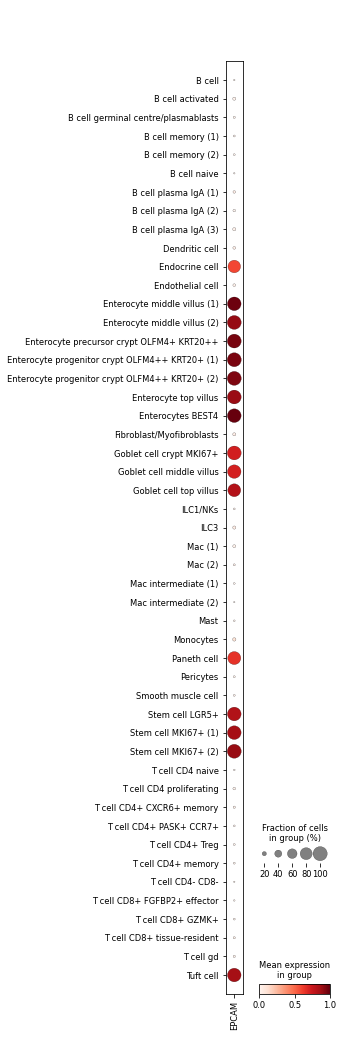

In [15]:
celltype_genes=['EPCAM']
sc.pl.dotplot(adata1, celltype_genes, groupby='predicted_celltype',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var')

In [16]:
fpath2="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/zenodo/version_v4/Replication_cohort.h5ad"
#fpath2="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/data_distribute/zenodo/Replication_cohort.h5ad"
#fpath2="/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/freeze_003/ti-cd_healthy-auto_processed_v001-labels_freeze_v003/2022-12-15_DGE/auto-annot-121/anderson_ti_freeze003_001-MT_100-cohort_Replication.h5ad"
adata2=sc.read(fpath2) 

/home/ubuntu/miniconda3/envs/python_env/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.


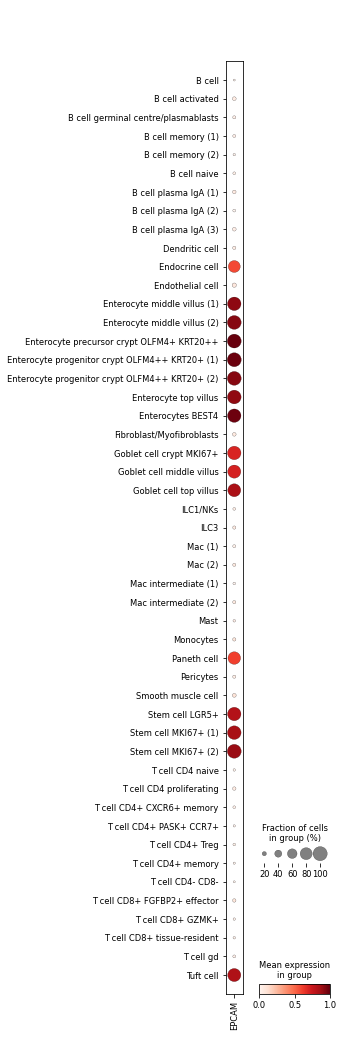

In [17]:
celltype_genes=['EPCAM']
sc.pl.dotplot(adata2, celltype_genes, groupby='predicted_celltype',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var')

In [8]:
adata1

AnnData object with n_obs × n_vars = 187361 × 33538
    obs: 'sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'disease_status__machine'
    var: 'gene_symbols', 'feature_types', 'gene_group__mito_transcript', 'gene_group__mito_protein', 'gene_group__ribo_protein', 'gene_group__ribo_rna', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_filtered_per_experiment'
    layers: 'counts', 'log1p_cp10k'

In [9]:
adata2

AnnData object with n_obs × n_vars = 254551 × 33538
    obs: 'sample_id', 'disease_status', 'biopsy_type', 'age', 'sex', 'inflammation_status', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'normalization_factor', 'pct_counts_gene_group__mito_transcript', 'cell_passes_qc', 'scrublet__multiplet_scores', 'scrublet__predicted_multiplet', 'predicted_celltype_probability', 'major_cell_type', 'predicted_celltype', 'label__machine', 'category__machine', 'disease_status__machine'
    var: 'gene_symbols', 'feature_types', 'gene_group__mito_transcript', 'gene_group__mito_protein', 'gene_group__ribo_protein', 'gene_group__ribo_rna', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_filtered_per_experiment'
    layers: 'counts', 'log1p_cp10k'

In [10]:
adata1.obs

,sample_id,disease_status,biopsy_type,age,sex,inflammation_status,log1p_n_genes_by_counts,log1p_total_counts,n_genes_by_counts,normalization_factor,pct_counts_gene_group__mito_transcript,cell_passes_qc,scrublet__multiplet_scores,scrublet__predicted_multiplet,predicted_celltype_probability,major_cell_type,predicted_celltype,label__machine,category__machine,disease_status__machine
0,CD1,Crohn's disease,terminal ileum,36.0,M,mild,8.882392,12.156430,7203,190313.0,12.331264,True,0.167675,False,0.999318,Secretory,Paneth cell,Paneth_cell,Secretory,CD
1,CD1,Crohn's disease,terminal ileum,36.0,M,mild,9.023770,12.151638,8297,189403.0,20.310659,True,0.179218,False,0.999518,Secretory,Paneth cell,Paneth_cell,Secretory,CD
2,CD1,Crohn's disease,terminal ileum,36.0,M,mild,8.812546,12.135972,6717,186459.0,13.310700,True,0.152782,False,0.999792,Secretory,Paneth cell,Paneth_cell,Secretory,CD
3,CD1,Crohn's disease,terminal ileum,36.0,M,mild,9.052633,12.115129,8540,182613.0,13.926719,True,0.179218,False,0.999618,Secretory,Paneth cell,Paneth_cell,Secretory,CD
4,CD1,Crohn's disease,terminal ileum,36.0,M,mild,8.929568,12.114642,7551,182524.0,11.348644,True,0.167675,False,0.999293,Secretory,Paneth cell,Paneth_cell,Secretory,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187356,H25,Healthy,terminal ileum,63.0,F,uninflamed,4.094345,7.157735,59,1283.0,95.401398,True,0.041428,False,0.881898,B Cell plasma,B cell plasma IgA (1),B_cell_plasma_IgA_1,B_Cell_plasma,H
187357,H25,Healthy,terminal ileum,63.0,F,uninflamed,6.238325,7.135687,511,1255.0,34.023903,True,0.215901,False,0.776407,Secretory,Goblet cell middle villus,Goblet_cell_middle_villus,Secretory,H
187358,H25,Healthy,terminal ileum,63.0,F,uninflamed,6.361302,7.142036,578,1263.0,23.119556,True,0.089020,False,0.851681,T Cell,T cell CD4 naive,T_cell_CD4_naive,T_Cell,H
187359,H25,Healthy,terminal ileum,63.0,F,uninflamed,6.095825,7.138867,443,1259.0,0.079428,True,0.120164,False,0.899236,T Cell,T cell CD4- CD8-,T_cell_CD4minus_CD8minus,T_Cell,H


In [11]:
adata2.obs

,sample_id,disease_status,biopsy_type,age,sex,inflammation_status,log1p_n_genes_by_counts,log1p_total_counts,n_genes_by_counts,normalization_factor,pct_counts_gene_group__mito_transcript,cell_passes_qc,scrublet__multiplet_scores,scrublet__predicted_multiplet,predicted_celltype_probability,major_cell_type,predicted_celltype,label__machine,category__machine,disease_status__machine
0,CD27,Crohn's disease,terminal ileum,40.0,M,moderate,7.796469,11.725510,2431,123686.0,0.785052,True,0.153315,False,0.998082,Secretory,Paneth cell,Paneth_cell,Secretory,CD
1,CD27,Crohn's disease,terminal ileum,40.0,M,moderate,7.809541,11.435029,2463,92505.0,0.644289,True,0.176181,False,0.999250,Secretory,Paneth cell,Paneth_cell,Secretory,CD
2,CD27,Crohn's disease,terminal ileum,40.0,M,moderate,7.878913,11.418307,2640,90971.0,0.881600,True,0.176181,False,0.999446,Secretory,Paneth cell,Paneth_cell,Secretory,CD
3,CD27,Crohn's disease,terminal ileum,40.0,M,moderate,7.567346,11.172869,1933,71172.0,0.307705,True,0.153315,False,0.995396,Secretory,Paneth cell,Paneth_cell,Secretory,CD
4,CD27,Crohn's disease,terminal ileum,40.0,M,moderate,7.335634,11.172335,1533,71134.0,0.605899,True,0.176181,False,0.998935,Secretory,Paneth cell,Paneth_cell,Secretory,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254546,CD50,Crohn's disease,terminal ileum,30.0,M,mild,5.916202,6.715384,370,824.0,0.364078,True,0.024736,False,0.751587,B Cell,B cell,B_cell,B_Cell,CD
254547,CD50,Crohn's disease,terminal ileum,30.0,M,mild,5.886104,6.593044,359,729.0,0.000000,True,0.020372,False,0.842852,B Cell,B cell,B_cell,B_Cell,CD
254548,CD50,Crohn's disease,terminal ileum,30.0,M,mild,5.983936,6.555357,396,702.0,0.569801,True,0.029899,False,0.517393,B Cell plasma,B cell plasma IgA (1),B_cell_plasma_IgA_1,B_Cell_plasma,CD
254549,CD50,Crohn's disease,terminal ileum,30.0,M,mild,5.963579,6.458338,388,637.0,10.989011,True,0.023133,False,0.598293,T Cell,T cell CD4+ PASK+ CCR7+,T_cell_CD4plus_PASKplus_CCR7plus,T_Cell,CD


In [9]:
X=adata3.layers['counts'].todense()

In [49]:
Y=pd.DataFrame(X.T, columns=adata3.obs.index, index=adata3.var['gene_symbols'])

In [51]:
Y.insert(0, "predicted_celltype", adata3.obs['predicted_celltype'])

In [52]:
Y

,predicted_celltype,0,1,2,3,4,5,6,7,8,...,187351,187352,187353,187354,187355,187356,187357,187358,187359,187360
gene_symbols,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC233755.1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC240274.1,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
